# 8-4-Enrichment-Analysis-R
Jakke Neiro$^1$

1. Aboobaker laboratory, Department of Zoology, University of Oxford

FPR_unbound_coe, FPR_bound_coe, TPR_unbound_coe, TPR_bound_coe

# ROC analysis

## ROC data

In [1]:
coe = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/ROC.csv")

In [2]:
coe_roc = data.frame("FPR" = c(coe$coe[1], coe$coe[2]), "TPR" = c(coe$coe[3], coe$coe[4]), "Color" = c("unbound", "bound"))

In [3]:
foxd = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/ROC.csv")

In [4]:
foxd_roc = data.frame("FPR" = c(foxd$fox[1], foxd$fox[2]), "TPR" = c(foxd$fox[3], foxd$fox[4]), "Color" = c("unbound", "bound"))

In [5]:
pax5 = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/ROC.csv")

In [6]:
pax5_roc = data.frame("FPR" = c(pax5$pax5[1], pax5$pax5[2]), "TPR" = c(pax5$pax5[3], pax5$pax5[4]), "Color" = c("unbound", "bound"))

In [7]:
myodblas = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCmyodblas.csv")

In [8]:
myodblas_roc = data.frame("FPR" = c(myodblas$myoDblas[1], myodblas$myoDblas[2]), "TPR" = c(myodblas$myoDblas[3], myodblas$myoDblas[4]), "Color" = c("unbound", "bound"))

In [9]:
myod = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCmyod.csv")

In [10]:
myod_roc = data.frame("FPR" = c(myod$myod[1], myod$myod[2]), "TPR" = c(myod$myod[3], myod$myod[4]), "Color" = c("unbound", "bound"))

In [11]:
nkx = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCnkx.csv")

In [12]:
nkx_roc = data.frame("FPR" = c(nkx$nkx[1], nkx$nkx[2]), "TPR" = c(nkx$nkx[3], nkx$nkx[4]), "Color" = c("unbound", "bound"))

In [13]:
hox1 = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/ROChox1.csv")

In [14]:
hox1_roc = data.frame("FPR" = c(hox1$hox1[1], hox1$hox1[2]), "TPR" = c(hox1$hox1[3], hox1$hox1[4]), "Color" = c("unbound", "bound"))

In [15]:
hox3a = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/ROChox3a.csv")

In [16]:
hox3a_roc = data.frame("FPR" = c(hox3a$hox3a[1], hox3a$hox3a[2]), "TPR" = c(hox3a$hox3a[3], hox3a$hox3a[4]), "Color" = c("unbound", "bound"))

In [17]:
lox5b = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/ROClox5b.csv")

In [18]:
lox5b_roc = data.frame("FPR" = c(lox5b$lox5b[1], lox5b$lox5b[2]), "TPR" = c(lox5b$lox5b[3], lox5b$lox5b[4]), "Color" = c("unbound", "bound"))

In [19]:
roc_summary = rbind(coe_roc, foxd_roc, pax5_roc, myod_roc, myodblas_roc, nkx_roc, hox1_roc, hox3a_roc, lox5b_roc)

In [20]:
roc_summary$Class = NA
roc_summary$Size = "small"

In [21]:
model <- lm(TPR ~ poly(FPR,2), data=roc_summary)

In [22]:
predict_data = data.frame("FPR" = seq(0,1,0.01))

In [23]:
model.predict = predict(model, predict_data)
model.predict = as.data.frame(model.predict)
model.predict$FPR = seq(0,1,0.01)
model.predict$Color = "Predicted"
model.predict$Class = "Predicted"
model.predict$Size = "big"

In [24]:
model.dataframe = data.frame("FPR" = model.predict$FPR, "TPR" = model.predict$model.predict, "Color" = model.predict$Color, "Class" = model.predict$Class, "Size"=model.predict$Size)

In [25]:
roc_summary_final  = rbind(roc_summary, model.dataframe)

## ROC Curve

In [26]:
library(ggplot2)

Warning message:
“Removed 36 rows containing missing values (geom_point).”


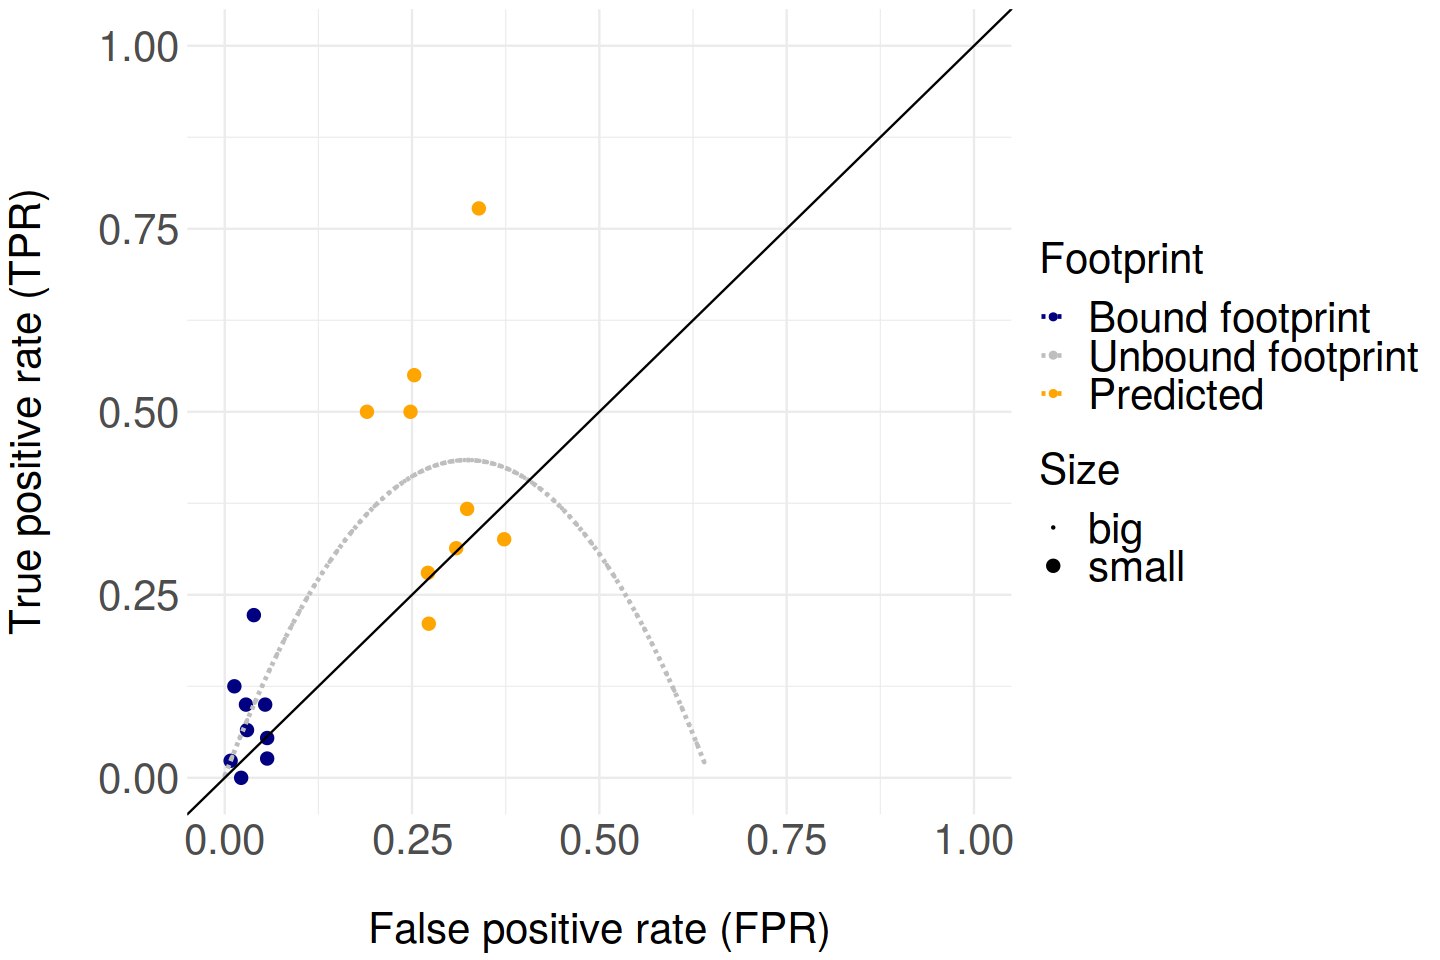

In [27]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 8)
p = ggplot(roc_summary_final) + geom_point(aes(x=FPR, y=TPR, col=Color, size=Size))+geom_line(aes(x=FPR, y=TPR, col=Class), na.rm = TRUE, linetype="dashed", size=1)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + geom_abline(intercept = 0, slope = 1, col="black")+xlim(0,1)+ylim(0,1)
p = p + xlab("\nFalse positive rate (FPR)") + ylab("True positive rate (TPR)\n")
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "grey", "orange"), labels=c("Bound footprint", "Unbound footprint", "Predicted"), na.translate = FALSE)
#p = p + scale_colour_manual(breaks = c("6", "4"),values=c("blue", "green"))
p = p + scale_size_manual(values=c(0.2, 3))
p

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



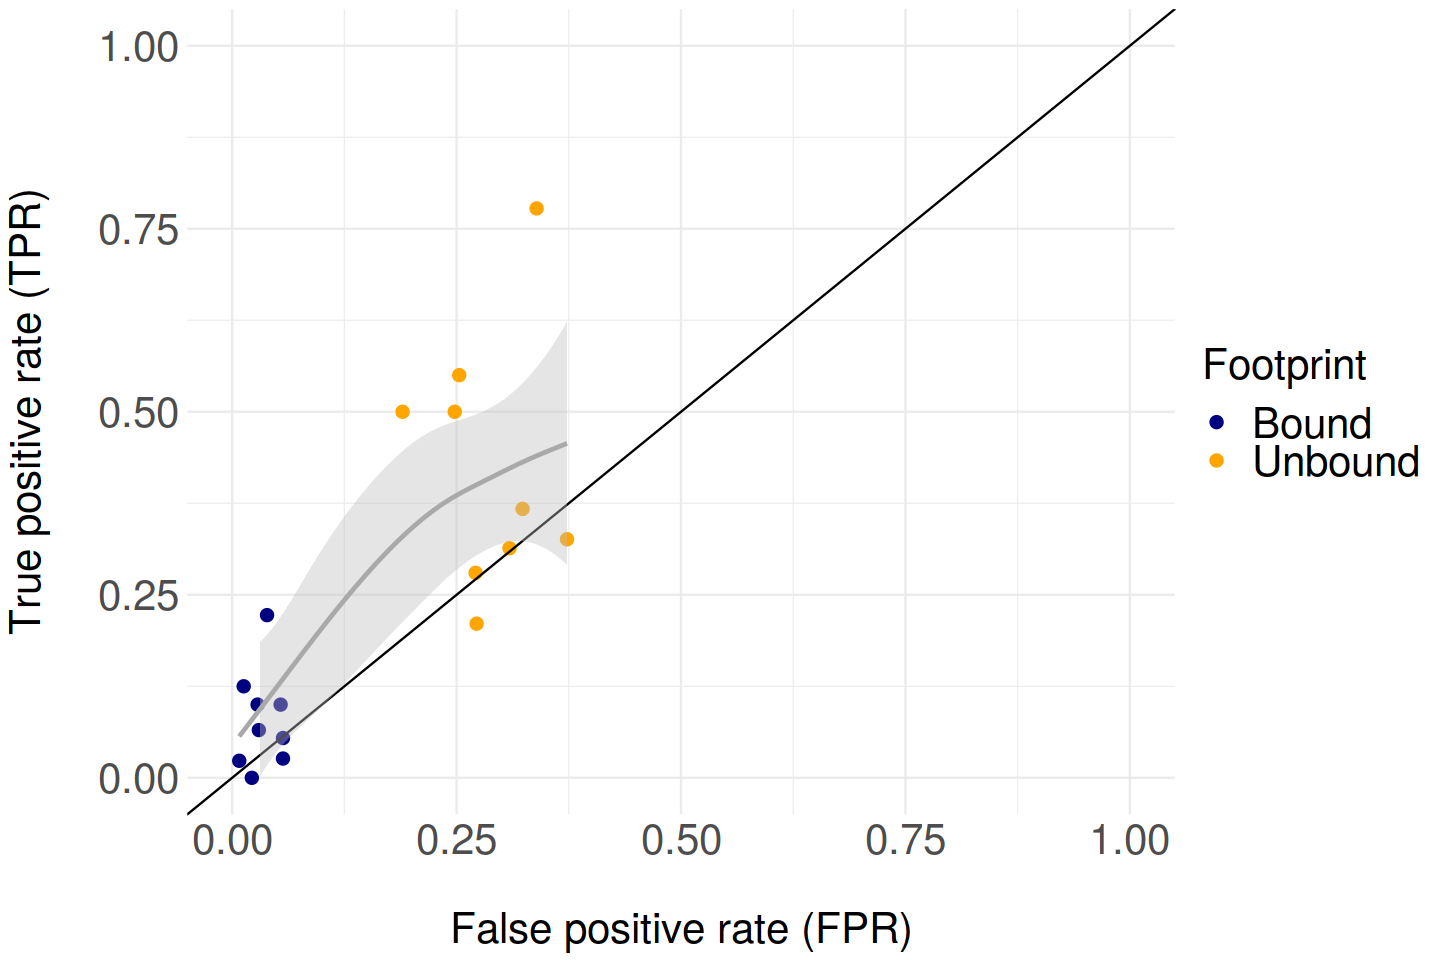

In [28]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 8)
p = ggplot(roc_summary) + geom_point(aes(x=FPR, y=TPR, col=Color), size=3)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + geom_abline(intercept = 0, slope = 1, col="black")+xlim(0,1)+ylim(0,1)
#p = p + geom_vline(xintercept = 0.05, col="red4")
p = p + xlab("\nFalse positive rate (FPR)") + ylab("True positive rate (TPR)\n")
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "orange"), labels=c("Bound", "Unbound"), na.translate = FALSE)
#p = p + scale_colour_manual(breaks = c("6", "4"),values=c("blue", "green"))
#p = p + scale_size_manual(values=c(0.2, 3))
p = p + stat_smooth(method="gam", aes(x=FPR, y=TPR), col="darkgrey", fill="grey")
p

In [68]:
TF_prop = read.csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv")
tf_subset = subset(TF_prop, TF_prop$Symbol %in% c("coe", "foxD1", "pax2/5/8-1", "Hox1", "Hox3a", "Lox5b", "myoD", "nkx1-1"))
roc_summary$name2 =  c("coe", "foxD1", "pax2/5/8-1", "myoD", "myoD", "nkx1-1", "Hox1", "Hox3a", "Lox5b",
                      "coe", "foxD1", "pax2/5/8-1", "myoD", "myoD", "nkx1-1", "Hox1", "Hox3a", "Lox5b")
roc_summary$X1.percent = 0
roc_summary$X2.percent = 0
roc_summary$Xins.percent = 0
for (i in 1:nrow(roc_summary)){
    roc_summary$X1.percent[i] = subset(tf_subset, tf_subset$Symbol == roc_summary$name2[i])$X1.percent[1]
    roc_summary$X2.percent[i] = subset(tf_subset, tf_subset$Symbol == roc_summary$name2[i])$X2.percent[1]
    roc_summary$Xins.percent[i] = subset(tf_subset, tf_subset$Symbol == roc_summary$name2[i])$Xins.percent[1]
}

In [72]:
roc_summary$AUC = (1 - roc_summary$FPR)*roc_summary$TPR+roc_summary$FPR*roc_summary$TPR*0.5+(1-roc_summary$FPR)*(1-roc_summary$TPR)*0.5

In [76]:
mean(roc_summary$AUC)

[1] 0.5459842

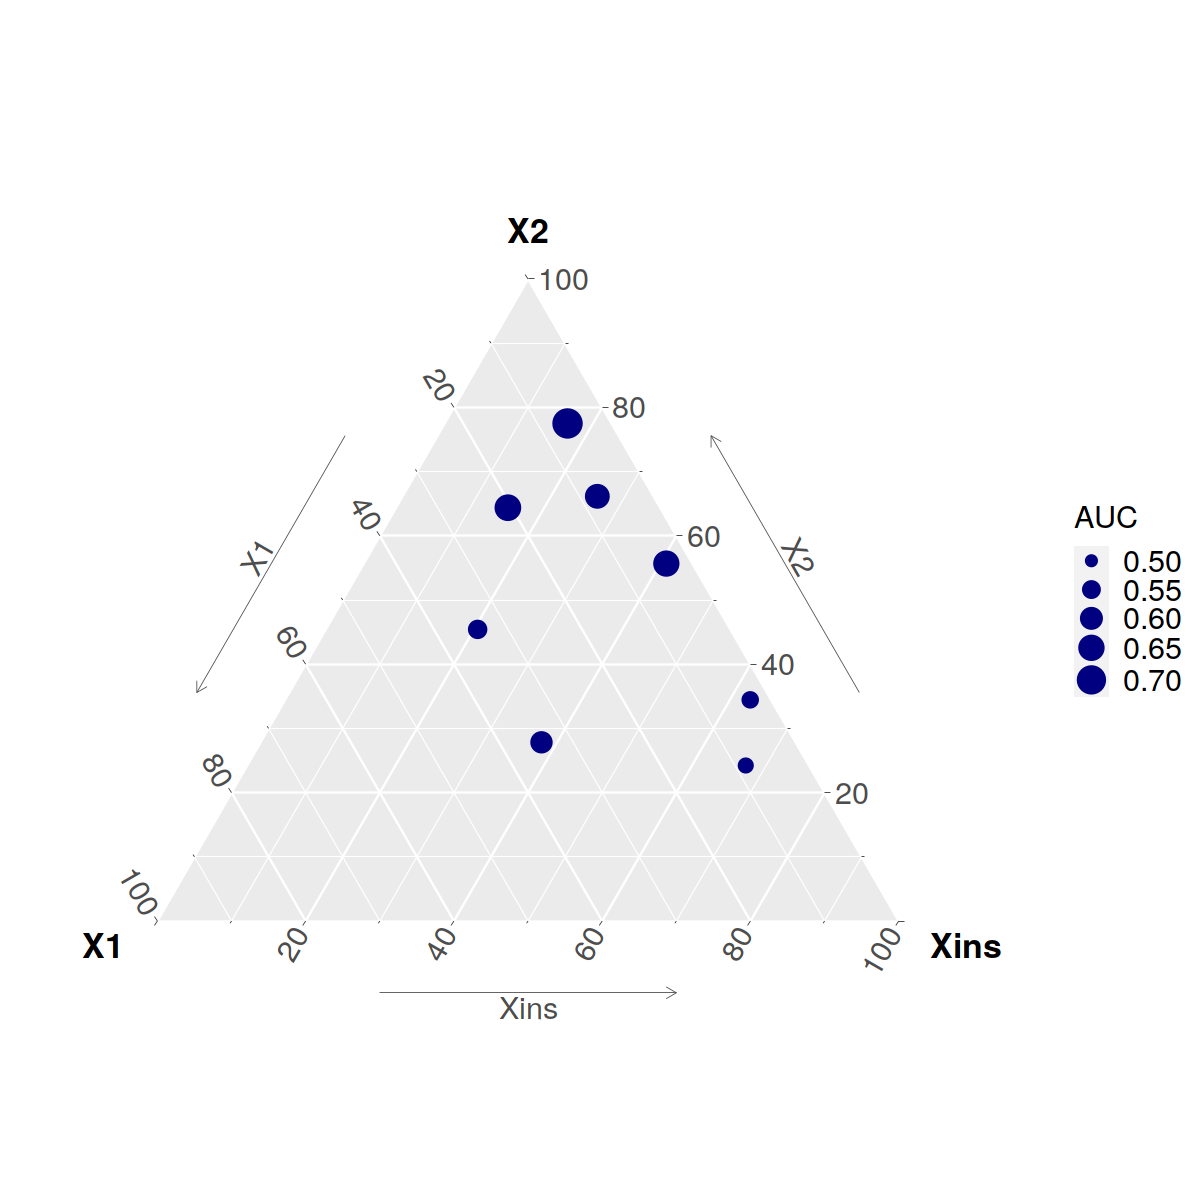

In [74]:
library(ggtern)
options(repr.plot.width = 10, repr.plot.height = 10)
plot <- ggtern(data=roc_summary, aes(X1.percent,X2.percent,Xins.percent, size=AUC))
#plot <- plot + stat_density_tern(geom='polygon', n = 100, aes(fill  = ..level..), bdl=0.01)
#plot <- plot + scale_fill_gradient(name="Density", low = "lightgrey",high = "orange")
plot <- plot + geom_point(col="navyblue")
plot <- plot + scale_size(name="AUC", range = c(0, 7.5))
plot <- plot + Tlab("X2") + Llab("X1") + Rlab("Xins")
plot <- plot + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), legend.title=element_text(size=18), legend.text=element_text(size=18))
plot <- plot + theme_showarrows()
#plot <- plot + geom_Rline(Rintercept=0.5, colour="red4") + geom_Lline(Lintercept=0.5, colour="red4") + geom_Tline(Tintercept=0.5, colour="red4")
#plot <- plot + geom_Rline(Rintercept=0, colour="black") + geom_Lline(Lintercept=0.0, colour="black") + geom_Tline(Tintercept=0.0, colour="black")
plot <- plot + scale_color_gradient(name="Information\ncontent", low="black", high="red")
#plot <- plot + ggtitle("Ternary plot of FACS expression of \n potential transcription factors")
plot

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”


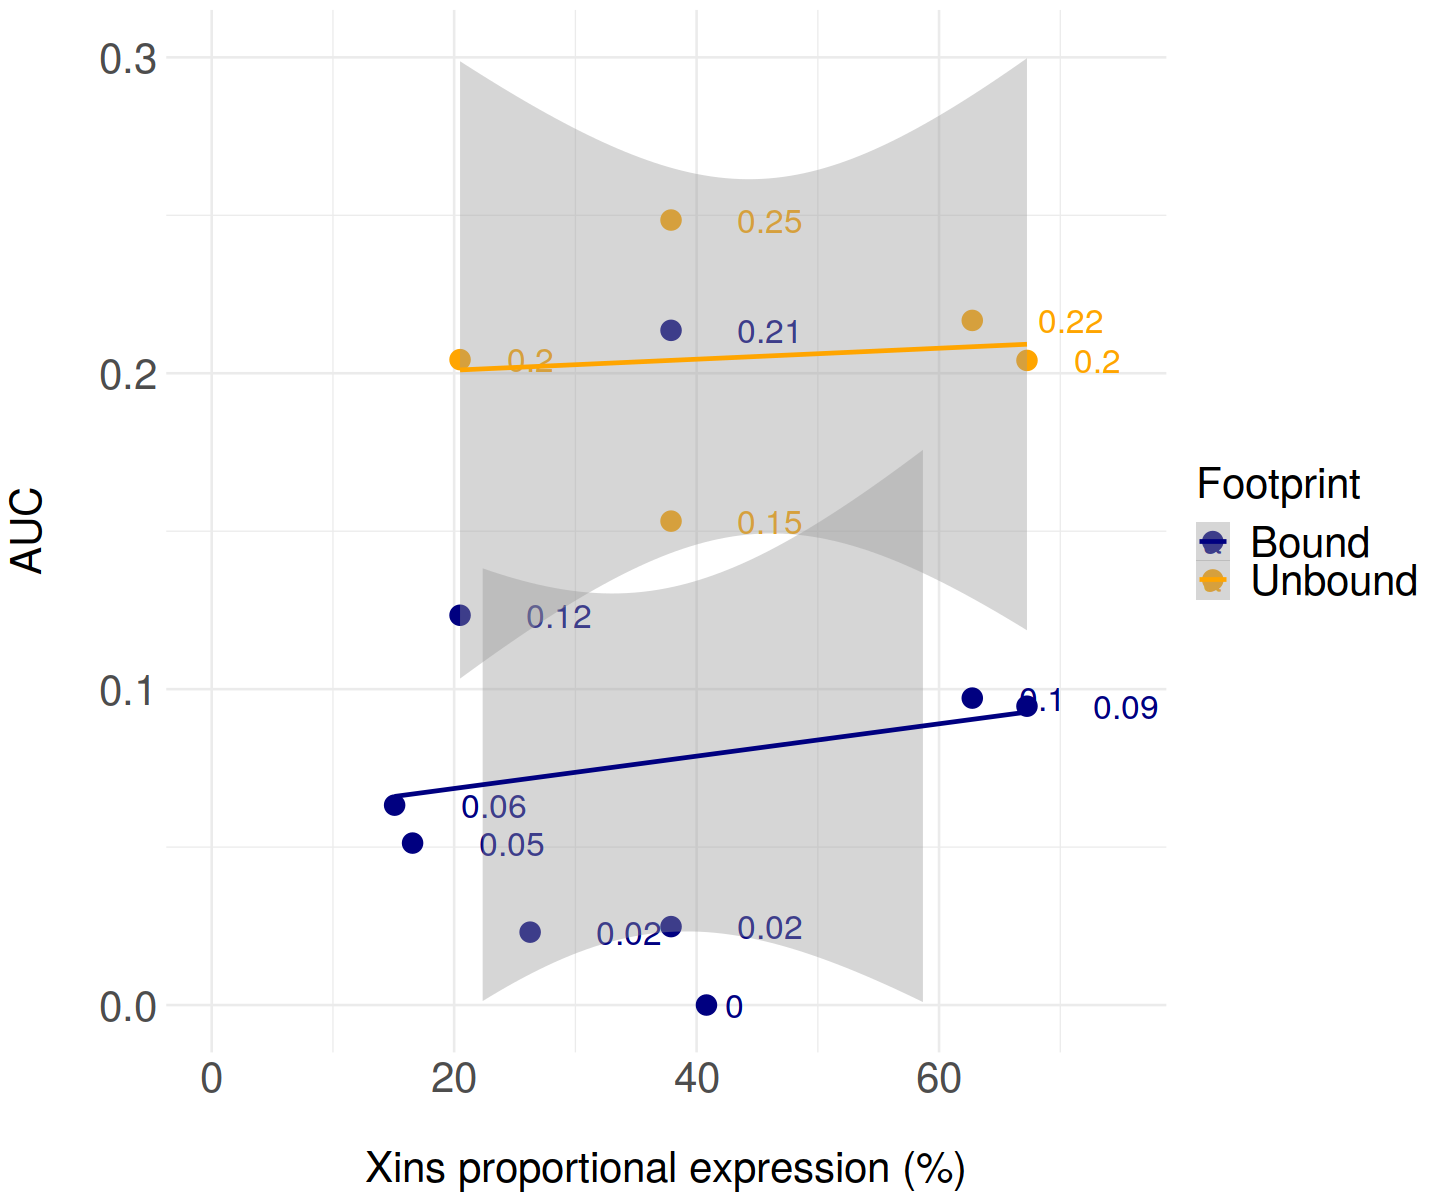

In [31]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 10)
p = ggplot(roc_summary, aes(x=Xins.percent*100, y=(1-FPR)*TPR, label=round((1-FPR)*TPR, digits = 2), col=Color)) + geom_point(size=5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlim(0, 75) + ylim(0, 0.3) + geom_text(size=7, hjust=-1)
p = p + xlab("\nXins proportional expression (%)")+ylab("AUC\n")
p = p + stat_smooth(method="lm", )
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "orange"), labels=c("Bound", "Unbound"), na.translate = FALSE)
p

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_text).”


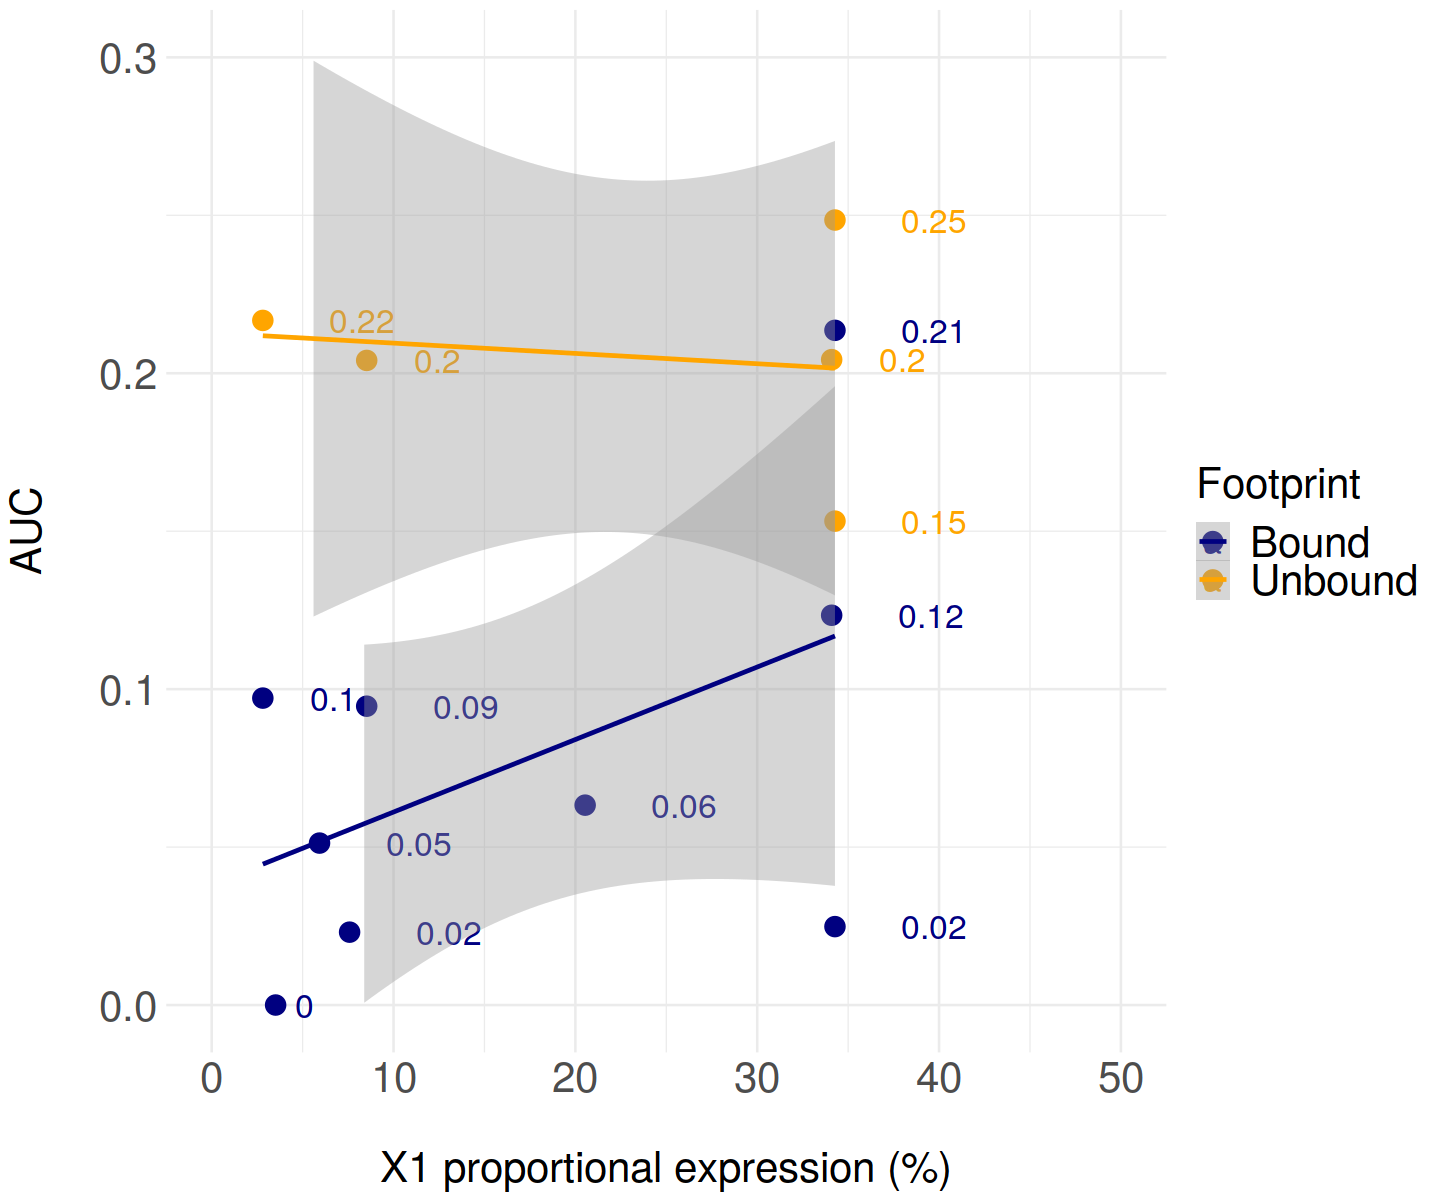

In [32]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 10)
p = ggplot(roc_summary, aes(x=X1.percent*100, y=(1-FPR)*TPR, label=round((1-FPR)*TPR, digits = 2), col=Color)) + geom_point(size=5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlim(0, 50) + ylim(0, 0.3) + geom_text(size=7, hjust=-1)
p = p + xlab("\nX1 proportional expression (%)")+ylab("AUC\n")
p = p + stat_smooth(method="lm", )
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "orange"), labels=c("Bound", "Unbound"), na.translate = FALSE)
p

# Enrichment

In [33]:
coe = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/ROC.csv")
coe_ratio = data.frame("unbound" = coe$coe[5], "bound"=coe$coe[6], "name"=c("coe"))
foxd = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/ROC.csv")
foxd_ratio = data.frame("unbound" = foxd$fox[5], "bound"=foxd$fox[6], "name"=c("foxD1"))
pax5 = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/ROC.csv")
pax5_ratio = data.frame("unbound" = pax5$pax5[5], "bound"=pax5$pax5[6], "name"=c("pax2/5/8-1"))
myod = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCmyod.csv")
myod_ratio = data.frame("unbound" = myod$myod[5], "bound"=myod$myod[6], "name"=c("myoD (whole)"))
myodblas = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCmyodblas.csv")
myodblas_ratio = data.frame("unbound" = myodblas$myoDblas[5], "bound"=myodblas$myoDblas[6], "name"=c("myoD (blastema)"))
nkx = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCnkx.csv")
nkx_ratio = data.frame("unbound" = nkx$nkx[5], "bound"=nkx$nkx[6], "name"=c("nkx1-1"))
hox1 = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/ROChox1.csv")
hox1_ratio = data.frame("unbound" = hox1$hox1[5], "bound"=hox1$hox1[6], "name"=c("hox1"))
hox3a = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/ROChox3a.csv")
hox3a_ratio = data.frame("unbound" = hox3a$hox3a[5], "bound"=hox3a$hox3a[6], "name"=c("hox3a"))
lox5b = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Arnold2021/ROClox5b.csv")
lox5b_ratio = data.frame("unbound" = lox5b$lox5b[5], "bound"=lox5b$lox5b[6], "name"=c("lox5b"))

In [34]:
ratio_summary = rbind(coe_ratio, foxd_ratio, pax5_ratio, myod_ratio, myodblas_ratio, nkx_ratio, hox1_ratio, hox3a_ratio, lox5b_ratio)

In [35]:
ratio_final = data.frame("value" = c(ratio_summary$unbound, ratio_summary$bound), "name" = c(ratio_summary$name, ratio_summary$name),
           "type" = c(rep("unbound", nrow(ratio_summary)), rep("bound", nrow(ratio_summary))))


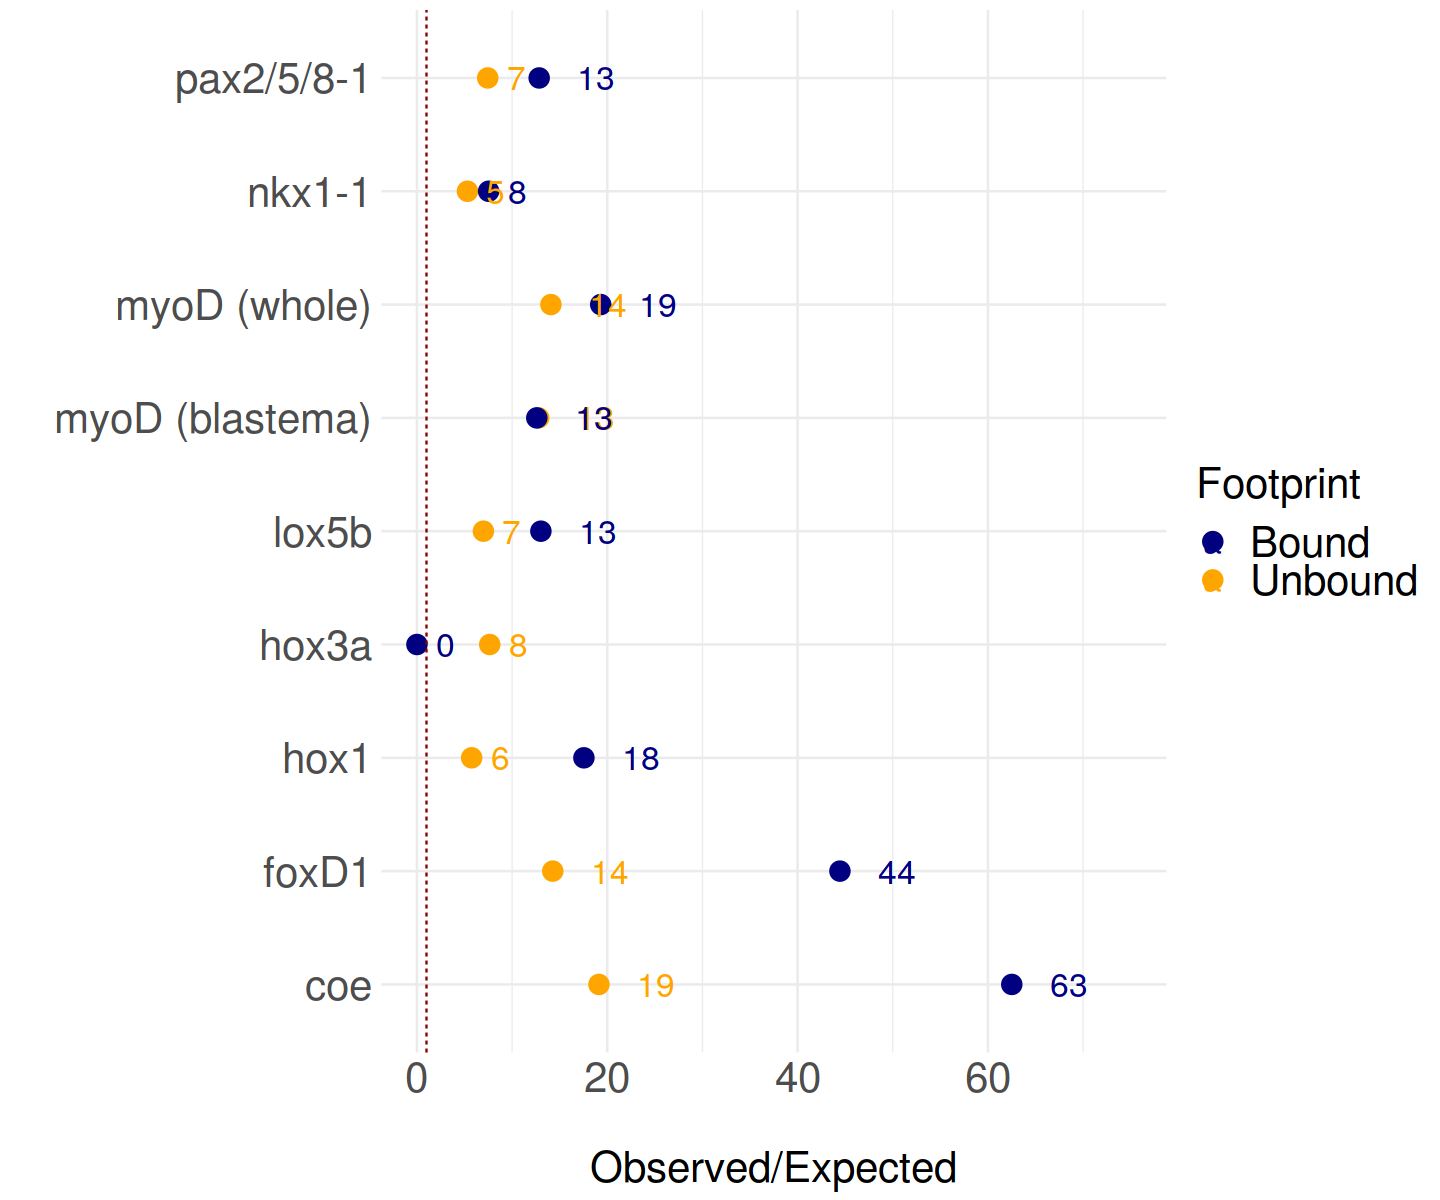

In [36]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 10)
p = ggplot(ratio_final, aes(x=value, y=name, label=round(value, digits = 0), col=type)) + geom_point(stat='identity', size=5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlim(0, 75) + geom_text(size=7, hjust=-1)
p = p + xlab("\nObserved/Expected")+ylab("")
p = p + geom_vline(xintercept=1, col="red4", linetype="dashed")
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "orange"), labels=c("Bound", "Unbound"), na.translate = FALSE)
p

In [37]:
mean(subset(ratio_final, ratio_final$type == "bound")$value)

[1] 21.09037

In [38]:
mean(subset(ratio_final, ratio_final$type == "unbound")$value)

[1] 10.37923

In [39]:
TF_prop = read.csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv")

In [40]:
tf_subset = subset(TF_prop, TF_prop$Symbol %in% c("coe", "foxD1", "pax2/5/8-1", "Hox1", "Hox3a", "Lox5b", "myoD", "nkx1-1"))

In [41]:
ratio_final$name2 =  c("coe", "foxD1", "pax2/5/8-1", "myoD", "myoD", "nkx1-1", "Hox1", "Hox3a", "Lox5b",
                      "coe", "foxD1", "pax2/5/8-1", "myoD", "myoD", "nkx1-1", "Hox1", "Hox3a", "Lox5b")

In [42]:
ratio_final$X1.percent = 0
ratio_final$X2.percent = 0
ratio_final$Xins.percent = 0
for (i in 1:nrow(ratio_final)){
    ratio_final$X1.percent[i] = subset(tf_subset, tf_subset$Symbol == ratio_final$name2[i])$X1.percent[1]
    ratio_final$X2.percent[i] = subset(tf_subset, tf_subset$Symbol == ratio_final$name2[i])$X2.percent[1]
    ratio_final$Xins.percent[i] = subset(tf_subset, tf_subset$Symbol == ratio_final$name2[i])$Xins.percent[1]
}

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_smooth).”


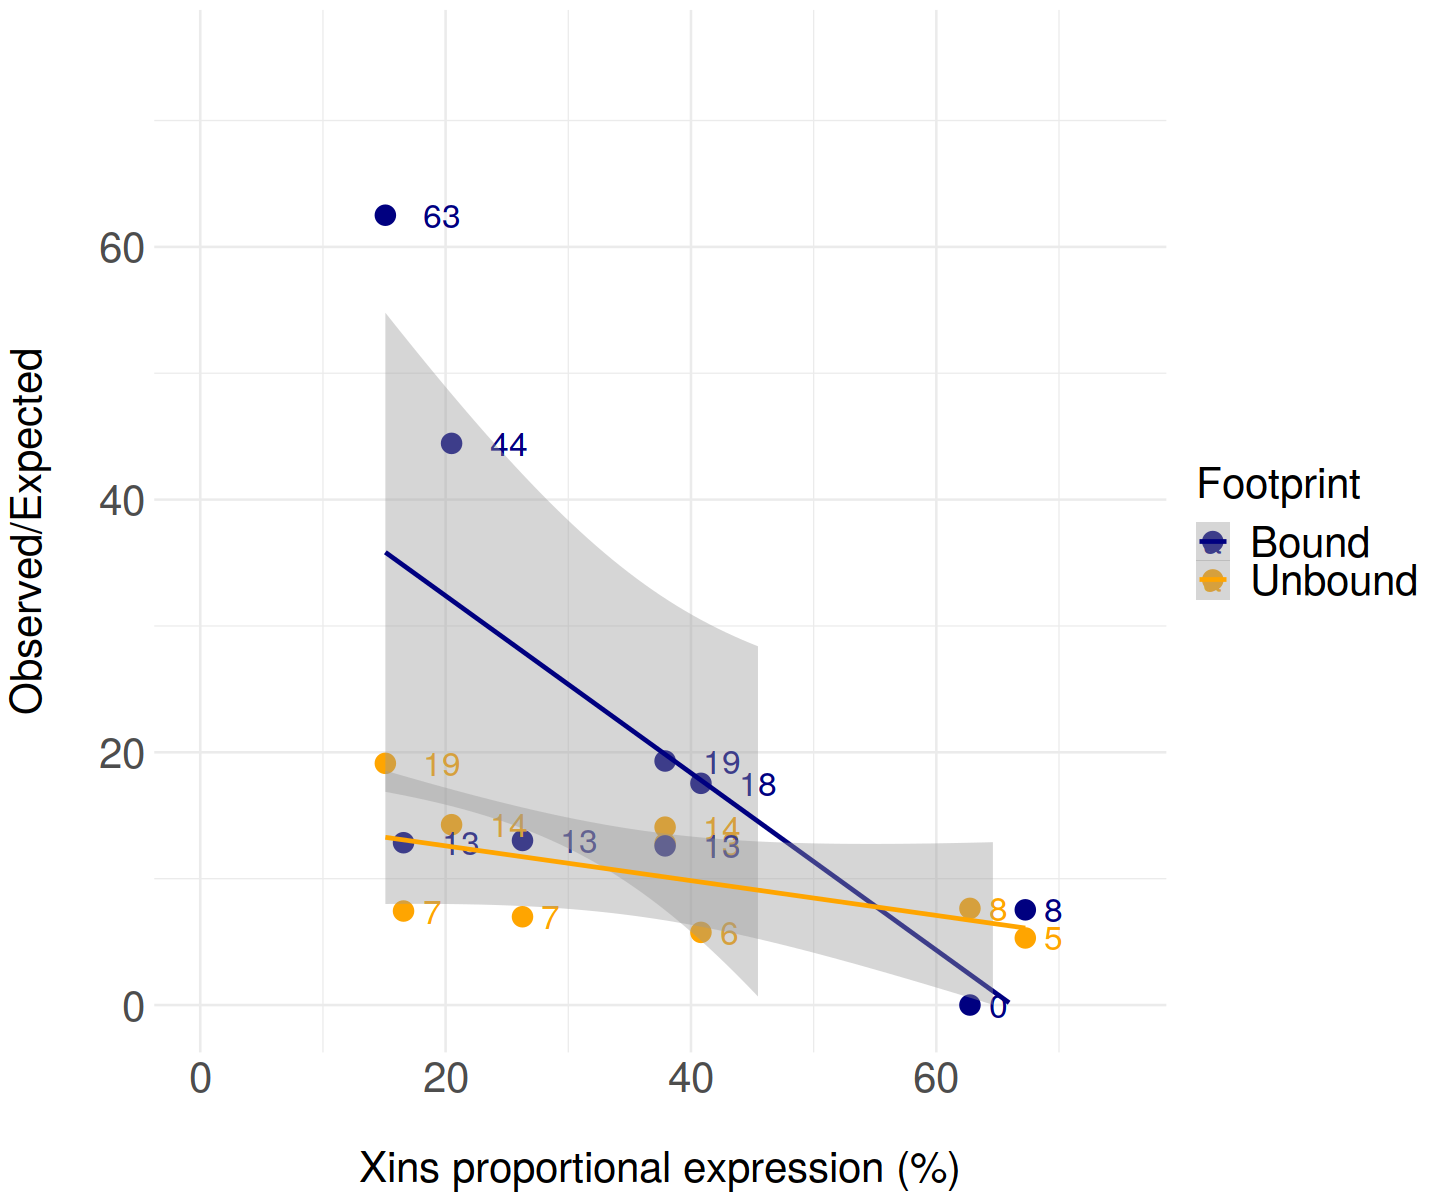

In [43]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 10)
p = ggplot(ratio_final, aes(x=Xins.percent*100, y=value, label=round(value, digits = 0), col=type)) + geom_point(size=5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlim(0, 75) + ylim(0, 75) + geom_text(size=7, hjust=-1)
p = p + xlab("\nXins proportional expression (%)")+ylab("Observed/Expected\n")
p = p + stat_smooth(method="lm", )
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "orange"), labels=c("Bound", "Unbound"), na.translate = FALSE)
p

`geom_smooth()` using formula 'y ~ x'



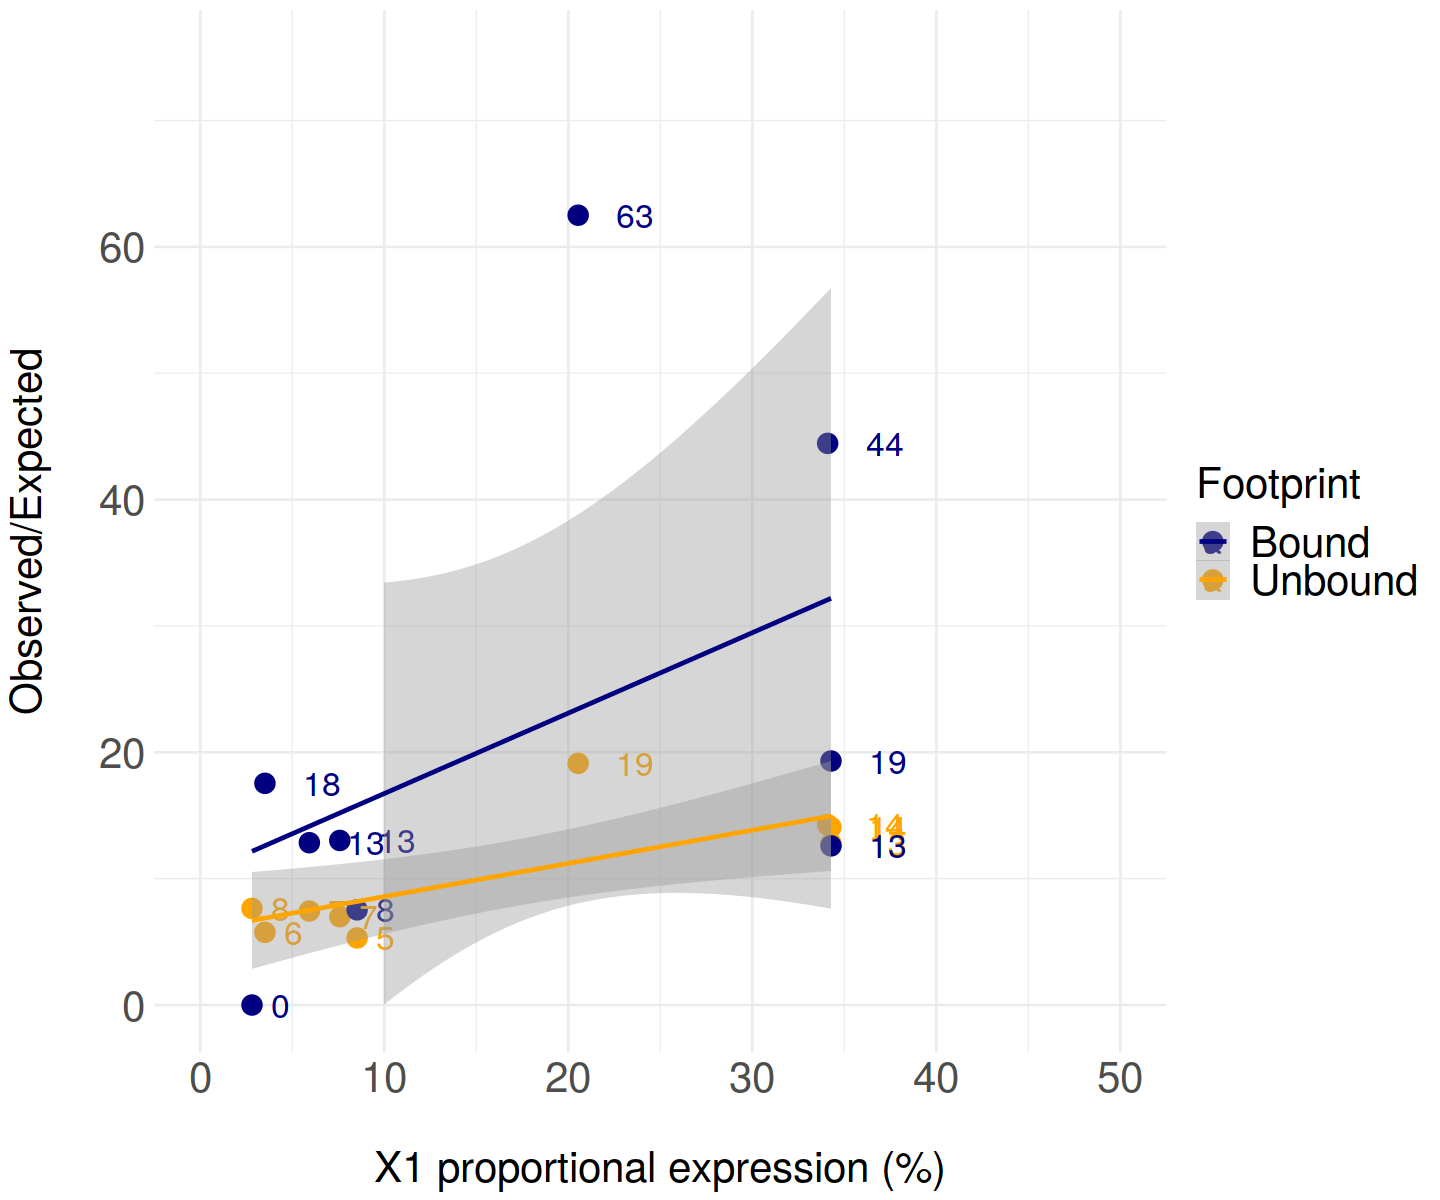

In [44]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 10)
p = ggplot(ratio_final, aes(x=X1.percent*100, y=value, label=round(value, digits = 0), col=type)) + geom_point(size=5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlim(0, 50) + ylim(0, 75) + geom_text(size=7, hjust=-1)
p = p + xlab("\nX1 proportional expression (%)")+ylab("Observed/Expected\n")
p = p + stat_smooth(method="lm", )
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "orange"), labels=c("Bound", "Unbound"), na.translate = FALSE)
p

`geom_smooth()` using formula 'y ~ x'



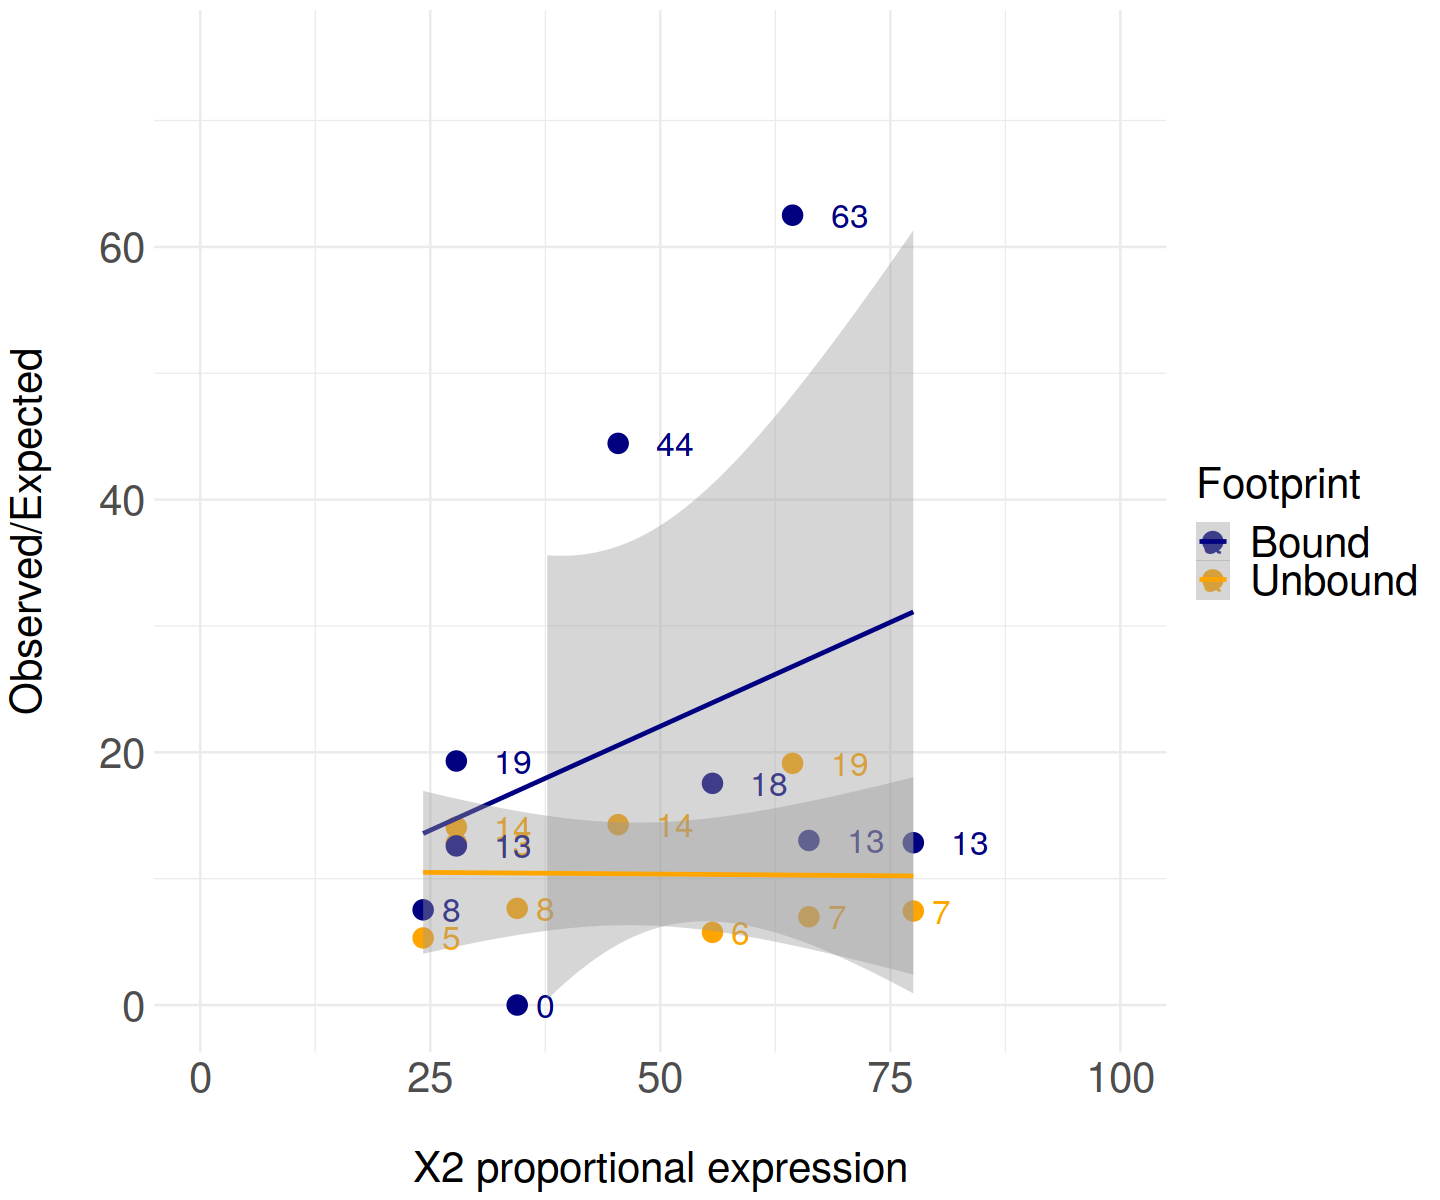

In [45]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 10)
p = ggplot(ratio_final, aes(x=X2.percent*100, y=value, label=round(value, digits = 0), col=type)) + geom_point(size=5)
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlim(0, 100) + ylim(0, 75) + geom_text(size=7, hjust=-1)
p = p + xlab("\nX2 proportional expression")+ylab("Observed/Expected\n")
p = p + stat_smooth(method="lm")
p = p + scale_colour_manual(name="Footprint", values=c("navyblue", "orange"), labels=c("Bound", "Unbound"), na.translate = FALSE)
p

In [46]:
ratio_final_bound = subset(ratio_final, ratio_final$type == "bound")

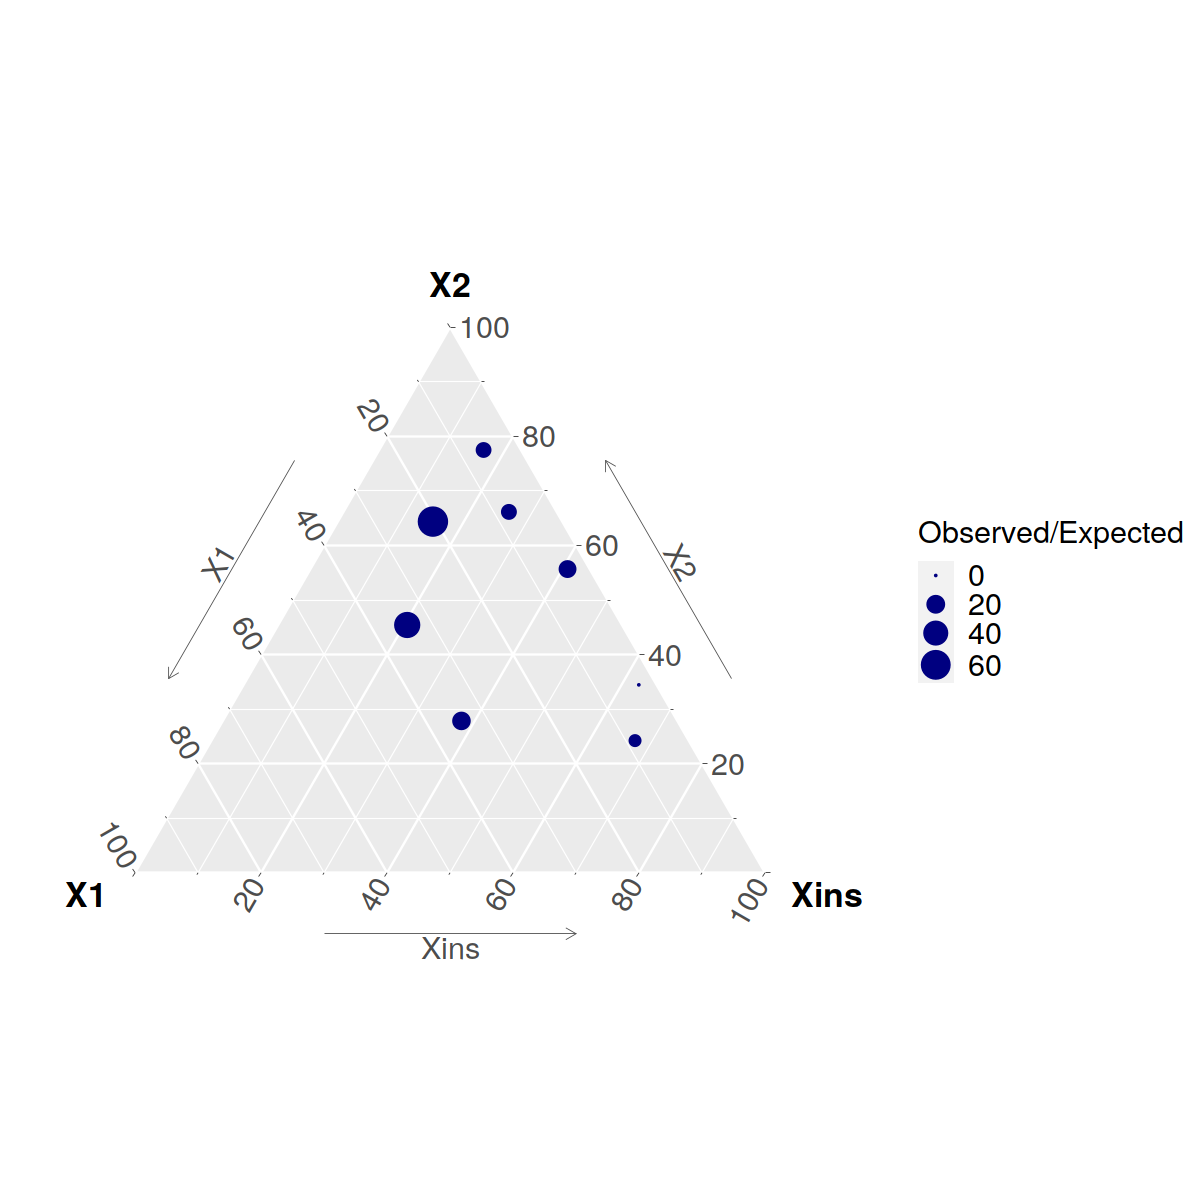

In [47]:
library(ggtern)
options(repr.plot.width = 10, repr.plot.height = 10)
plot <- ggtern(data=ratio_final_bound, aes(X1.percent,X2.percent,Xins.percent, size=value))
#plot <- plot + stat_density_tern(geom='polygon', n = 100, aes(fill  = ..level..), bdl=0.01)
#plot <- plot + scale_fill_gradient(name="Density", low = "lightgrey",high = "orange")
plot <- plot + geom_point(col="navyblue")
plot <- plot + scale_size(name="Observed/Expected", range = c(0, 7.5))
plot <- plot + Tlab("X2") + Llab("X1") + Rlab("Xins")
plot <- plot + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), legend.title=element_text(size=18), legend.text=element_text(size=18))
plot <- plot + theme_showarrows()
#plot <- plot + geom_Rline(Rintercept=0.5, colour="red4") + geom_Lline(Lintercept=0.5, colour="red4") + geom_Tline(Tintercept=0.5, colour="red4")
#plot <- plot + geom_Rline(Rintercept=0, colour="black") + geom_Lline(Lintercept=0.0, colour="black") + geom_Tline(Tintercept=0.0, colour="black")
plot <- plot + scale_color_gradient(name="Information\ncontent", low="black", high="red")
#plot <- plot + ggtitle("Ternary plot of FACS expression of \n potential transcription factors")
plot

## Confusion matrix

In [48]:
coe = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/ROC.csv")
coe_matrix_unbound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(coe$coe[7], coe$coe[8], coe$coe[10], coe$coe[9]))
foxd = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/ROC.csv")
foxd_matrix_unbound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(foxd$fox[7], foxd$fox[8], foxd$fox[10], foxd$fox[9]))
pax5 = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/ROC.csv")
pax5_matrix_unbound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(pax5$pax5[7], pax5$pax5[8], pax5$pax5[10], pax5$pax5[9]))
myod = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCmyod.csv")
myod_matrix_unbound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(myod$myod[7], myod$myod[8], myod$myod[10], myod$myod[9]))
nkx = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCnkx.csv")
nkx_matrix_unbound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(nkx$nkx[7], nkx$nkx[8], nkx$nkx[10], nkx$nkx[9]))

In [49]:
coe = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Cowles2014/ROC.csv")
coe_matrix_bound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(coe$coe[7+4], coe$coe[8+4], coe$coe[10+4], coe$coe[9+4]))
foxd = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Vogg2014/ROC.csv")
foxd_matrix_bound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(foxd$fox[7+4], foxd$fox[8+4], foxd$fox[10+4], foxd$fox[9+4]))
pax5 = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Stowers2016/ROC.csv")
pax5_matrix_bound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(pax5$pax5[7+4], pax5$pax5[8+4], pax5$pax5[10+4], pax5$pax5[9+4]))
myod = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCmyod.csv")
myod_matrix_bound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(myod$myod[7+4], myod$myod[8+4], myod$myod[10+4], myod$myod[9+4]))
nkx = read.csv("/drives/raid/AboobakerLab/jakke/TF_RNAi_RNAseq/Scimone2017/ROCnkx.csv")
nkx_matrix_bound = data.frame("var1" = c("A", "B", "A", "B"), "var2"=c("B", "B", "A", "A"), 
                          "value"=c(nkx$nkx[7+4], nkx$nkx[8+4], nkx$nkx[10+4], nkx$nkx[9+4]))

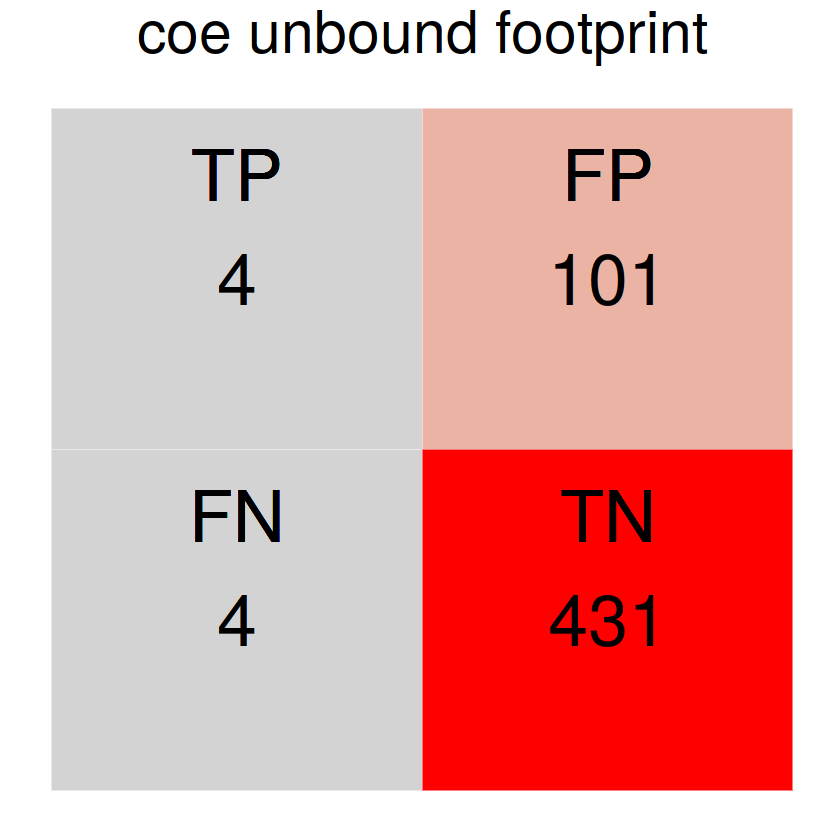

In [50]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 7)
plot_matrix = function(matrix, name){
p = ggplot(data = matrix, aes(x=var1, y=var2, fill=value))
p = p + geom_tile(color = "white") +
   theme_minimal()+ggtitle(name) + scale_fill_gradient(low="lightgrey", high="red")
p = p + geom_text(aes(var1, var2, label = value), color = "black", size = 15)
p = p + geom_text(x="A", y="A", label="FN", vjust=-1.5, color = "black", size = 15)+
geom_text(x="A", y="B", label="TP", vjust=-1.5, color = "black", size = 15)+
geom_text(x="B", y="A", label="TN", vjust=-1.5, color = "black", size = 15)+
geom_text(x="B", y="B", label="FP", vjust=-1.5, color = "black", size = 15)+
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
   axis.text.x = element_blank(),
  axis.text.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = "None", plot.title = element_text(hjust = 0.5, size=35))+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))
p 
}
plot_matrix(coe_matrix_unbound, "coe unbound footprint")

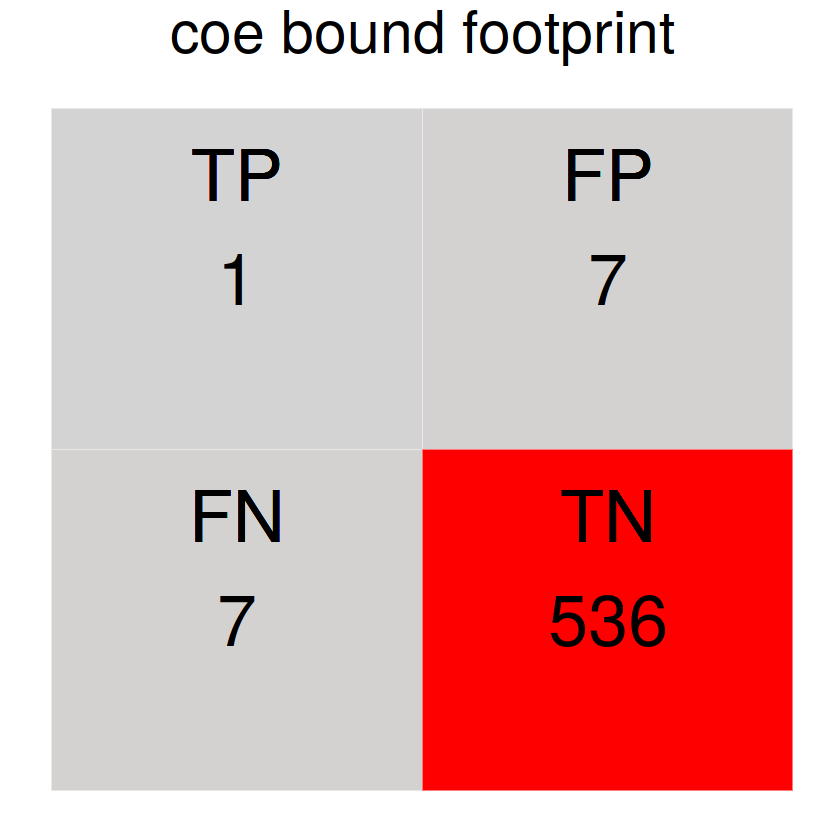

In [51]:
plot_matrix(coe_matrix_bound, "coe bound footprint")

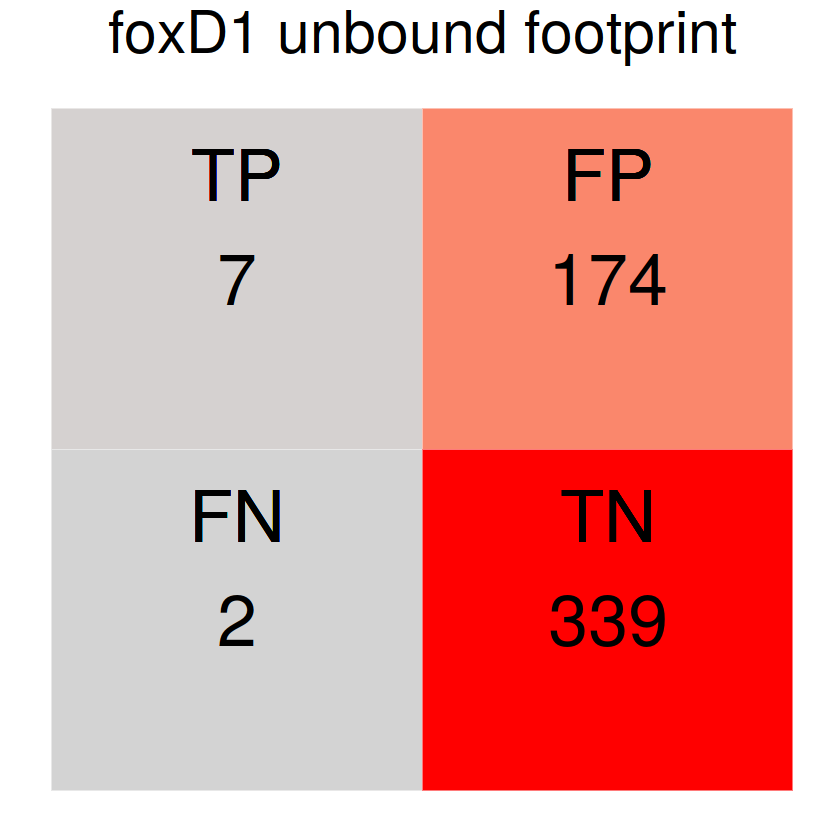

In [52]:
plot_matrix(foxd_matrix_unbound, "foxD1 unbound footprint")

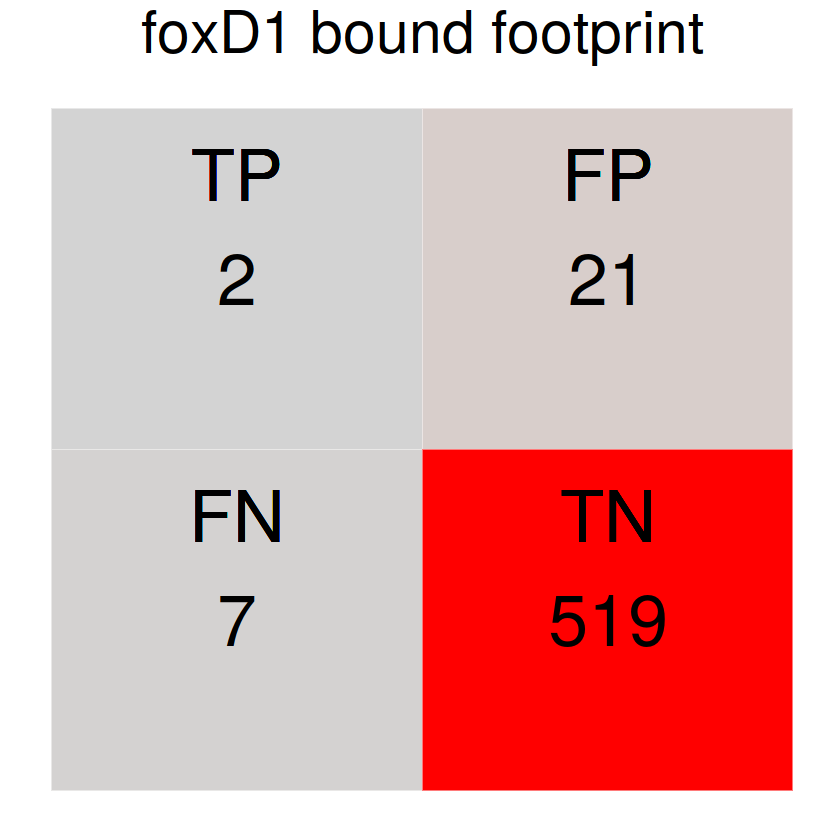

In [53]:
plot_matrix(foxd_matrix_bound, "foxD1 bound footprint")

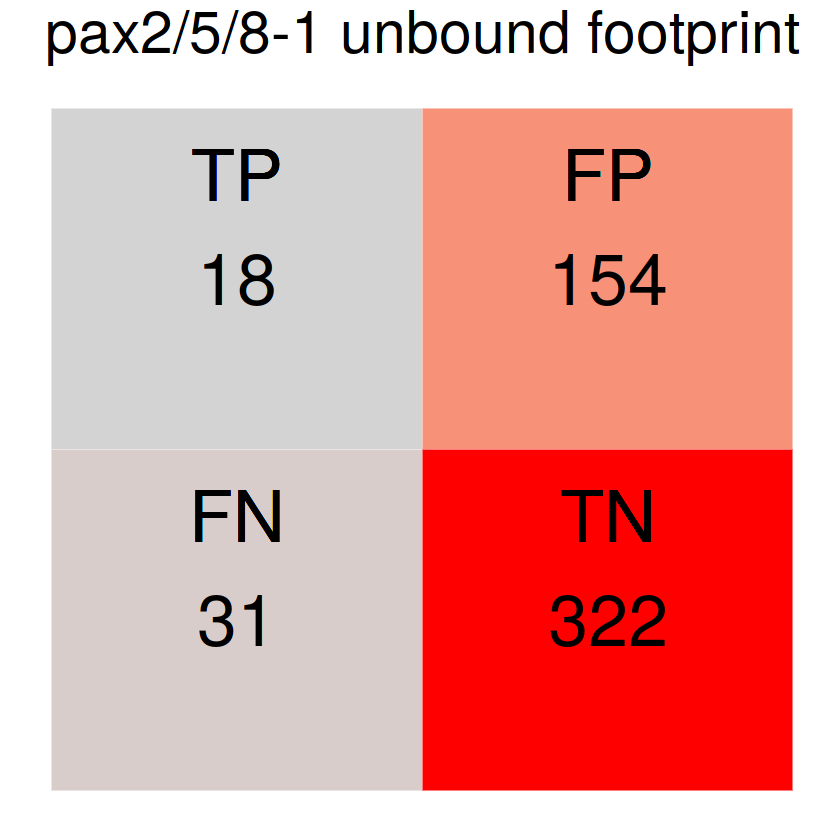

In [54]:
plot_matrix(pax5_matrix_unbound, "pax2/5/8-1 unbound footprint")

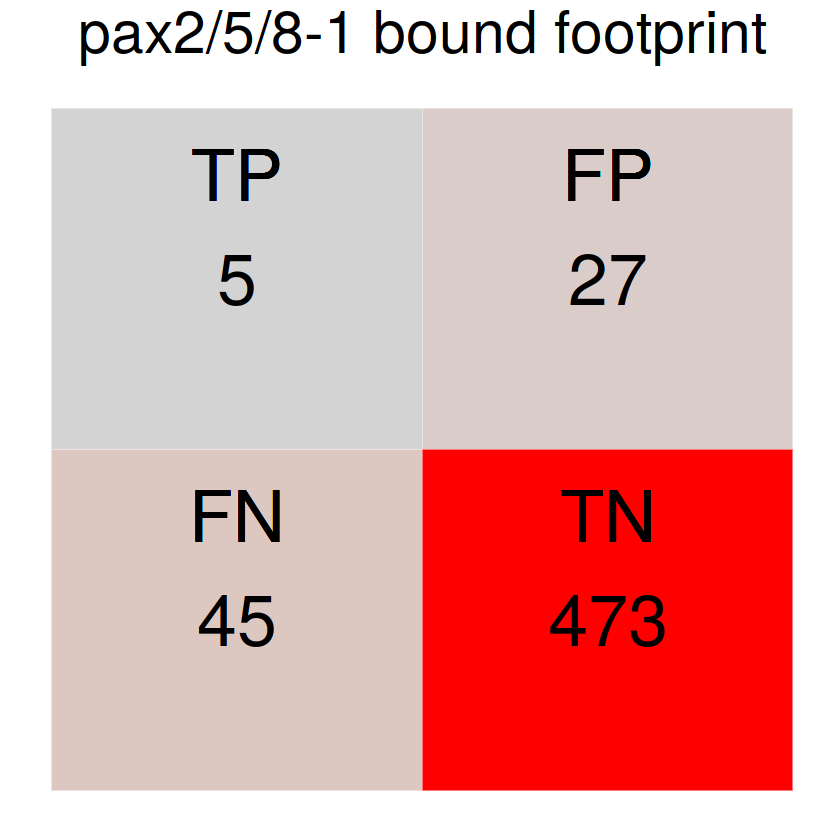

In [55]:
plot_matrix(pax5_matrix_bound, "pax2/5/8-1 bound footprint")

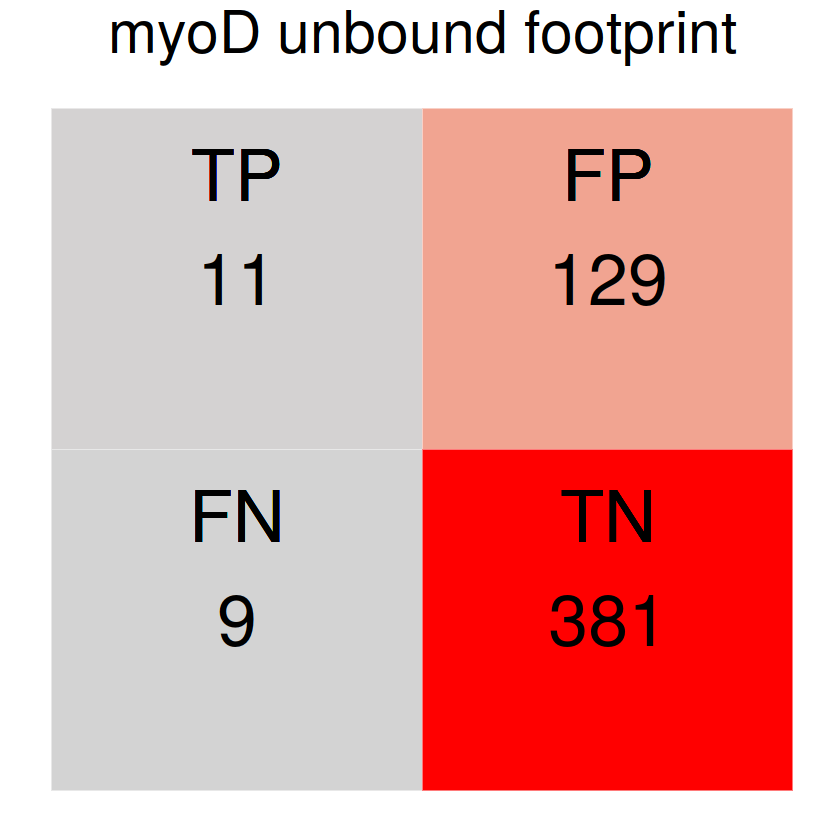

In [56]:
plot_matrix(myod_matrix_unbound, "myoD unbound footprint")

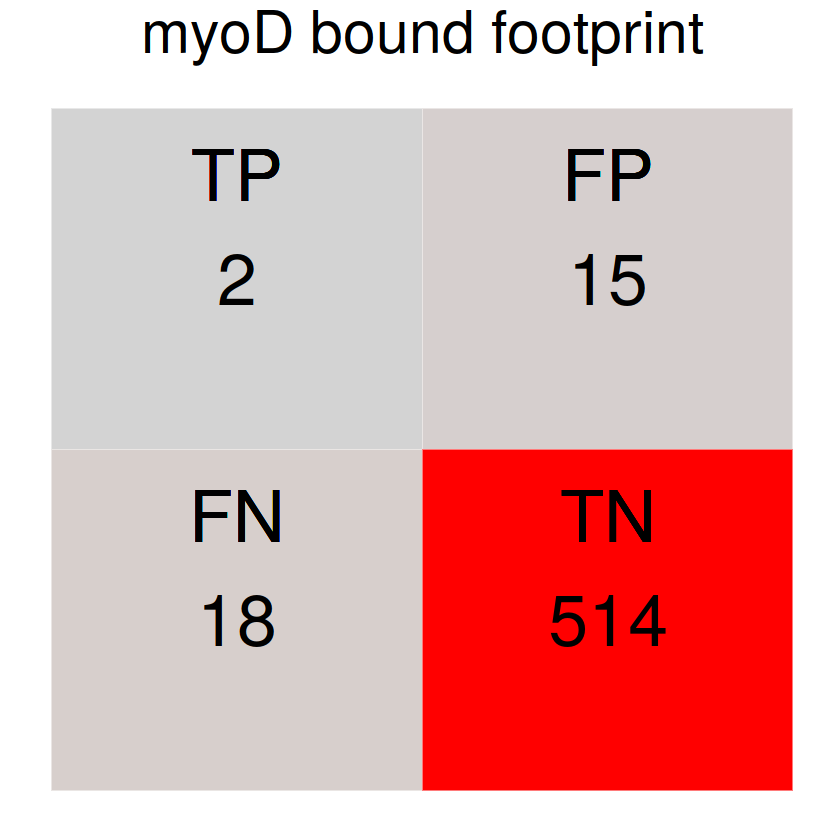

In [57]:
plot_matrix(myod_matrix_bound, "myoD bound footprint")

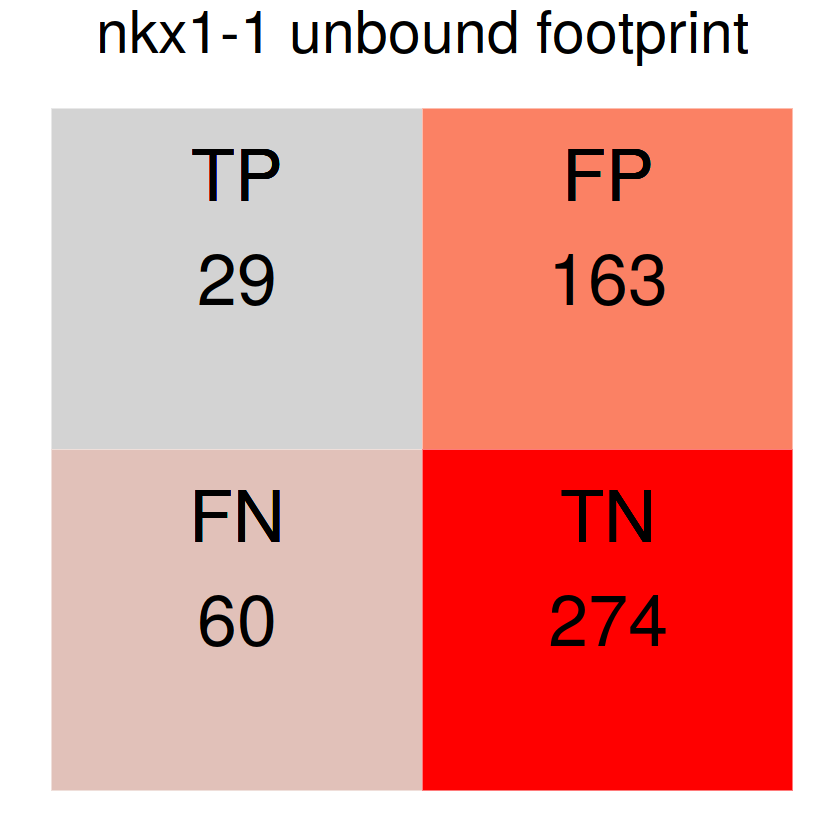

In [58]:
plot_matrix(nkx_matrix_unbound, "nkx1-1 unbound footprint")

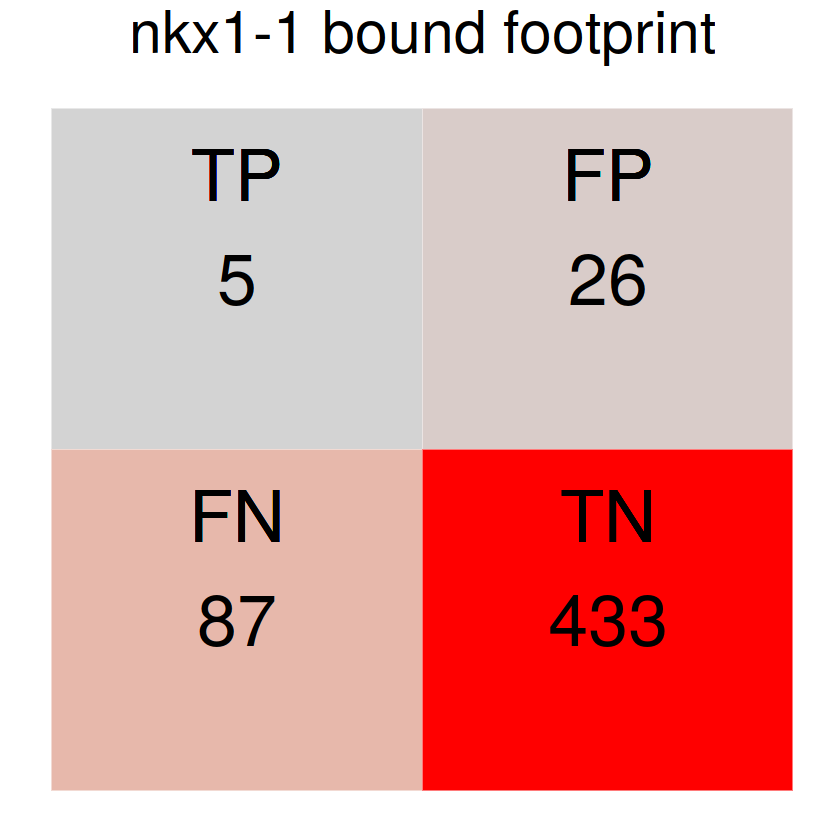

In [59]:
plot_matrix(nkx_matrix_bound, "nkx1-1 bound footprint")